# Linnerud dataset in Scikit-learn

### describe how to create a Regression model that would plot the relationship between the waistline and how many situps are accomplished.

To create a reggression model that plot the relationship between waist and situps. you can follow these steps: 

import the necessary libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, model_selection

Load the Linnerud dataset, and play around it.

In [5]:
x, y = datasets.load_linnerud(return_X_y=True)
print(x.shape)
print(x[0])

(20, 3)
[  5. 162.  60.]


In [6]:
x

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [7]:
y

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

Extract the relevant data

In [8]:
x = x[:, np.newaxis, 1]

In [9]:
x

array([[162.],
       [110.],
       [101.],
       [105.],
       [155.],
       [101.],
       [101.],
       [125.],
       [200.],
       [251.],
       [120.],
       [210.],
       [215.],
       [ 50.],
       [ 70.],
       [210.],
       [ 60.],
       [230.],
       [225.],
       [110.]])

In [10]:
y = y[:, np.newaxis, 1]

In [11]:
y

array([[36.],
       [37.],
       [38.],
       [35.],
       [35.],
       [36.],
       [38.],
       [34.],
       [31.],
       [33.],
       [34.],
       [33.],
       [34.],
       [46.],
       [36.],
       [37.],
       [37.],
       [32.],
       [33.],
       [33.]])

In [12]:
print(x.shape)

(20, 1)


In [13]:
print(y.shape)

(20, 1)


Split the data into training and testing.

In [14]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3)

In [15]:
x_test

array([[120.],
       [101.],
       [251.],
       [ 70.],
       [110.],
       [230.]])

In [16]:
y_test

array([[34.],
       [36.],
       [33.],
       [36.],
       [37.],
       [32.]])

In [17]:
x_train

array([[101.],
       [ 50.],
       [162.],
       [ 60.],
       [110.],
       [210.],
       [225.],
       [105.],
       [215.],
       [210.],
       [101.],
       [200.],
       [125.],
       [155.]])

In [18]:
y_train

array([[38.],
       [46.],
       [36.],
       [37.],
       [33.],
       [37.],
       [33.],
       [35.],
       [34.],
       [33.],
       [38.],
       [31.],
       [34.],
       [35.]])

Create and train the regression model

In [19]:
model = linear_model.LinearRegression()
model

LinearRegression()

In [20]:
model.fit(x_train, y_train)

LinearRegression()

Make prediction.

In [21]:
y_pred = model.predict(x_test)
y_pred

array([[36.69044449],
       [37.43445089],
       [31.56071615],
       [38.64835607],
       [37.0820268 ],
       [32.38303901]])

In [22]:
y_test

array([[34.],
       [36.],
       [33.],
       [36.],
       [37.],
       [32.]])

Now, evaluate the model using MSE or R-Squared

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(x_test, y_test)

In [25]:
print("mean_squared_error", mse)
print("R-squared", r2)

mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')
print('Model determination: ')

mean_squared_error 3.0891526778724216
R-squared 0.041297444798213956
Mean error: 1.76 (4.93%)
Model determination: 


Visualize the results.

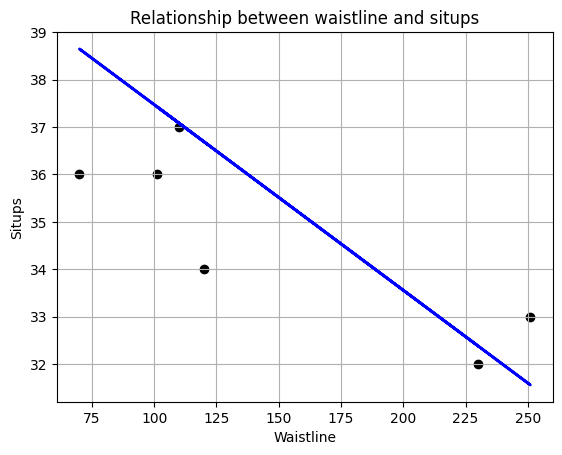

In [26]:
plt.scatter(x_test, y_test, color= 'black')
plt.plot(x_test, y_pred, color='blue', linewidth=2)
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.title('Relationship between waistline and situps')
plt.grid(True)
plt.show()